In [11]:
import cv2
import numpy as np
import mss
from PIL import Image
from IPython.display import display

In [5]:
def grab_screen_shot():
    sct = mss.mss()
    for _, monitor in enumerate(sct.monitors[2:], 1):
        sct_img = sct.grab(monitor)    # Get get screenshot of whole screen
        frame = cv2.cvtColor(np.asarray(sct_img), cv2.COLOR_BGRA2RGB)
        # frame = frame[46:IMG_HEIGHT + 46, 12:IMG_WIDTH + 12]    #cut the frame to the size of the game
        # render_frame(frame)    #🐜 render the frame for debugging
        # print('📷 screenshot grabbed')
        return frame

0.9554838709677419


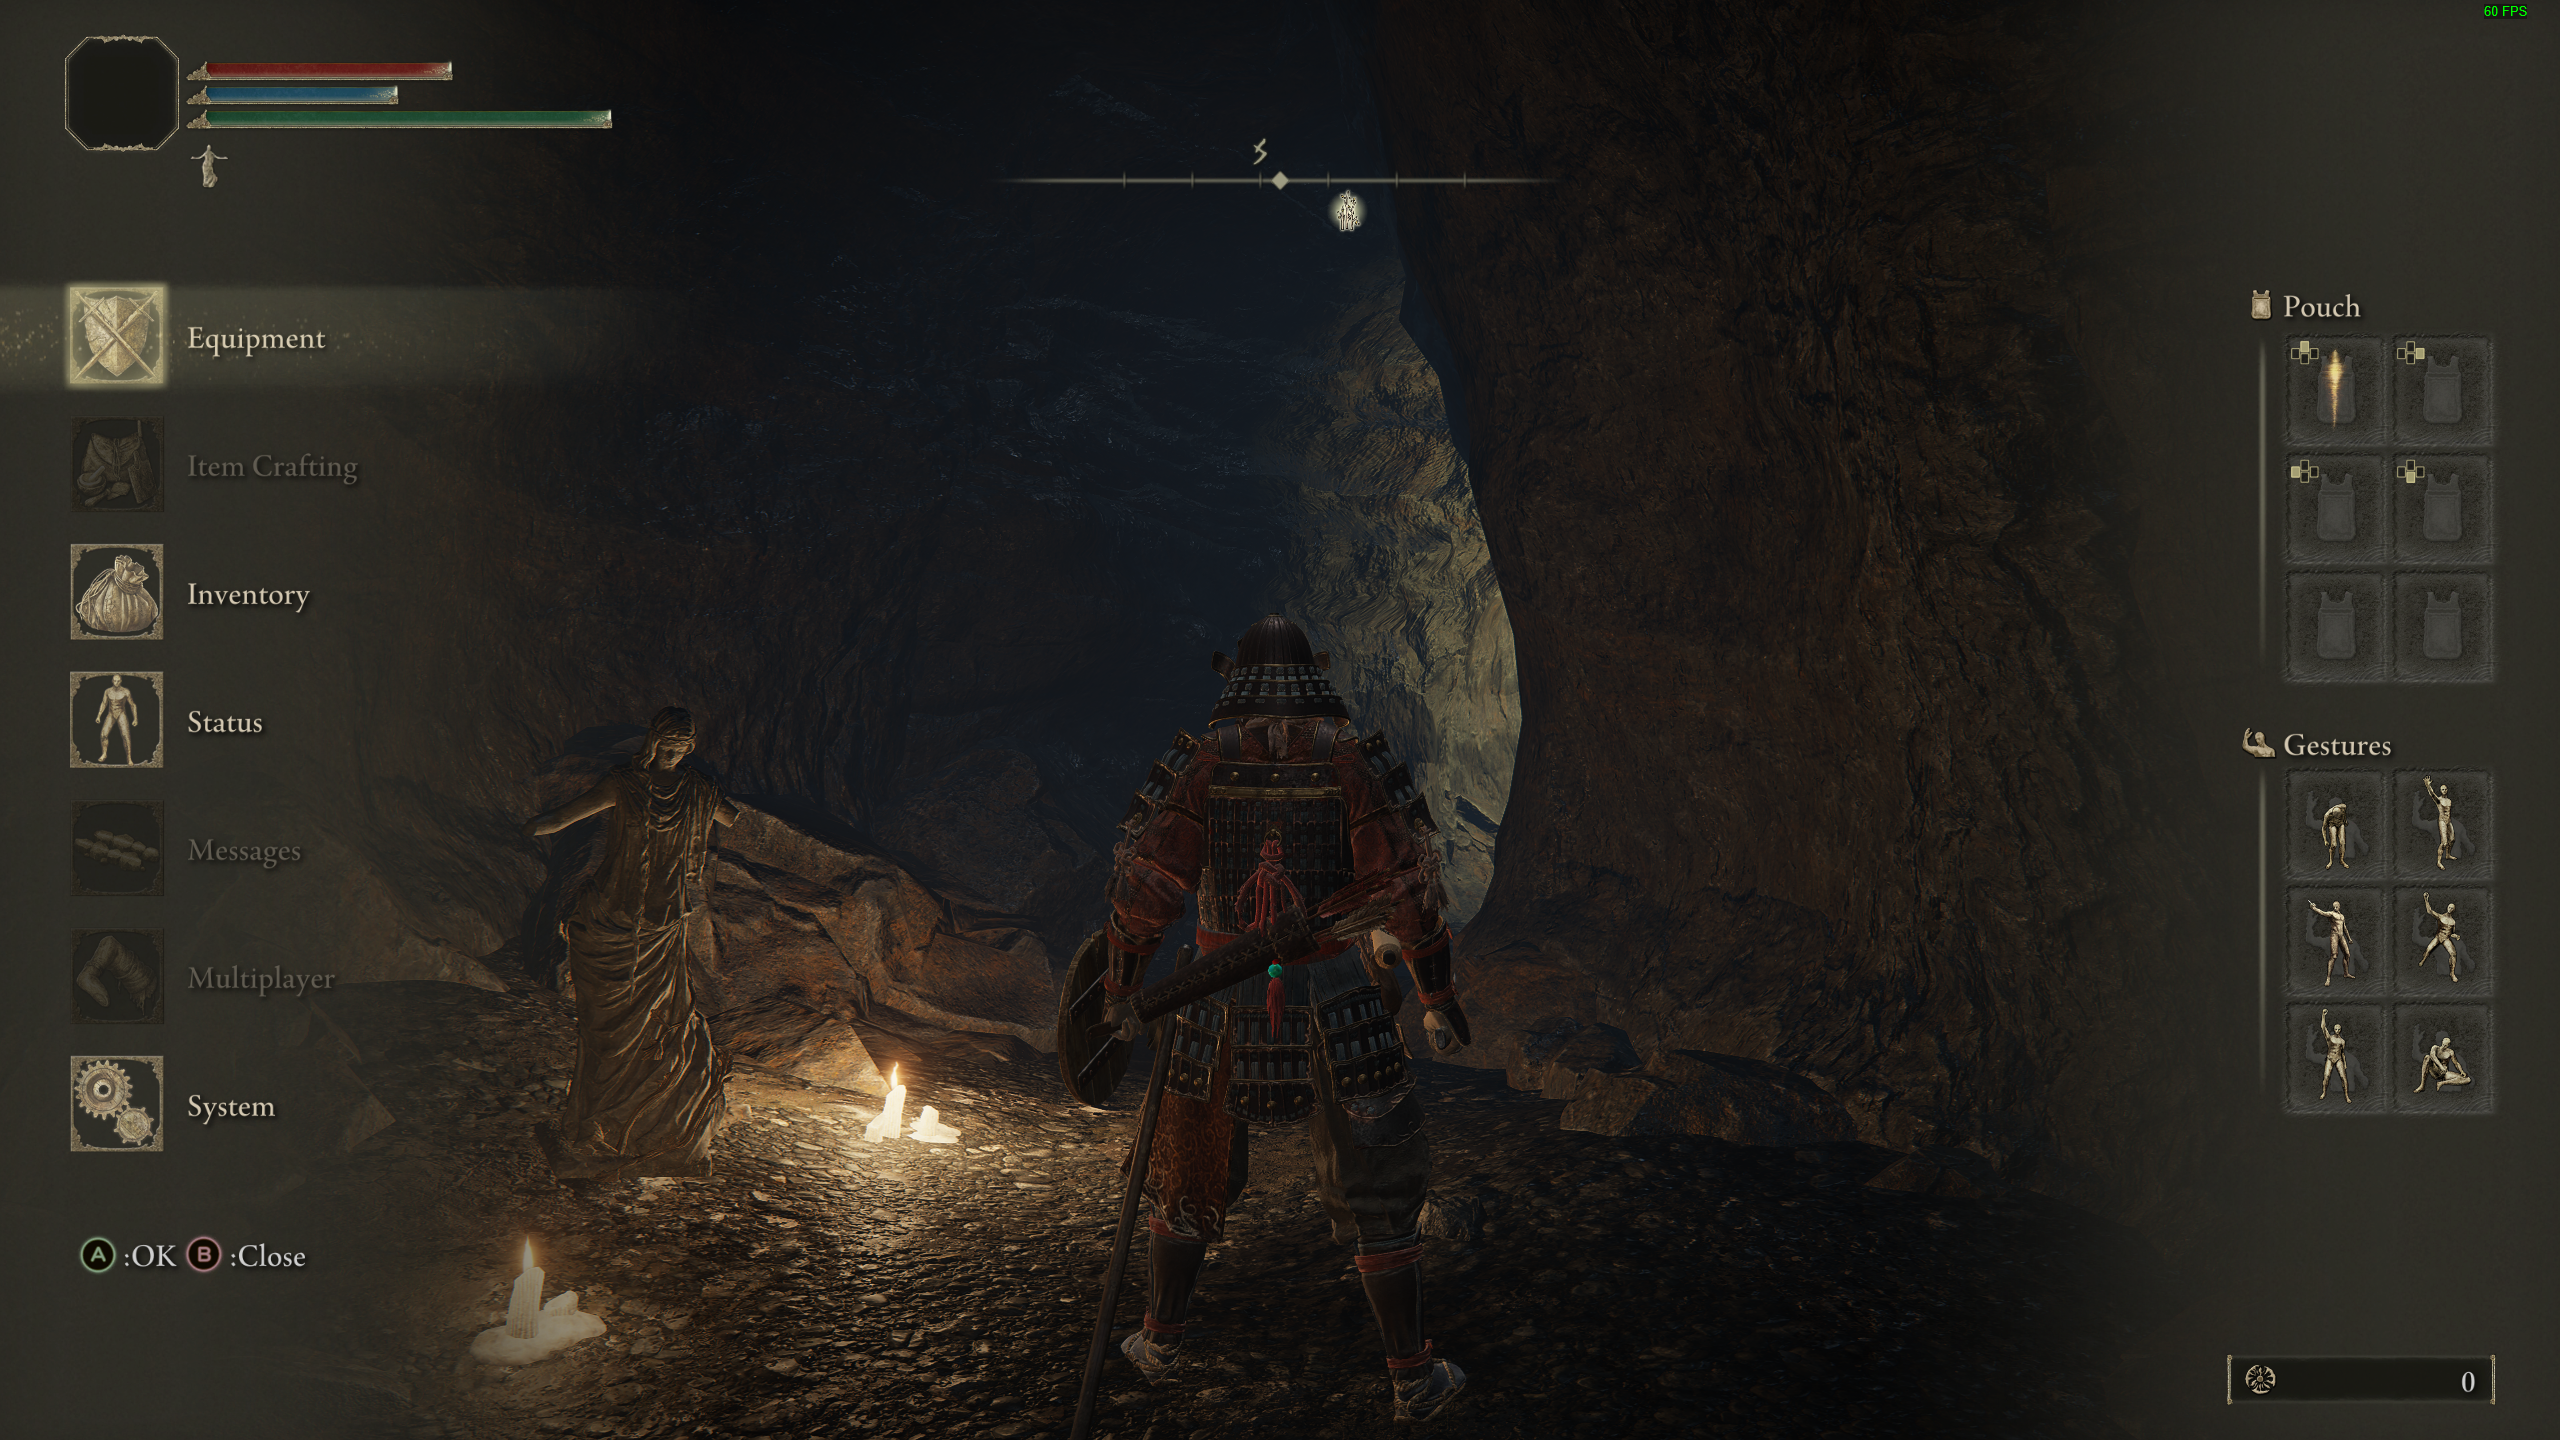

In [22]:
def get_current_hp(frame):
    max_hp = 455
    hp_ratio = 0.403
    hp_image = frame[65:70, 205:290 + int(max_hp * hp_ratio) - 20]
    hp_display = Image.fromarray(hp_image)
    display(hp_display)
    lower = np.array([0,90,75])
    upper = np.array([150,255,125])
    hsv = cv2.cvtColor(hp_image, cv2.COLOR_RGB2HSV)
    mask = cv2.inRange(hsv, lower, upper)
    # render_frame(mask)
    matches = np.argwhere(mask==255)
    curr_hp = len(matches) / (hp_image.shape[1] * hp_image.shape[0])

    curr_hp += 0.02
    if curr_hp >= 0.96:
        curr_hp = 1.0

    return curr_hp

image = grab_screen_shot()
print(get_current_hp(image))
image = Image.fromarray(image)
display(image)

In [ ]:
def get_current_stamina(self, frame):
    stam_image = frame[115:120, 200:200 + 445]
    # render_frame(stam_image)
    lower = np.array([0,100,0])
    upper = np.array([150,255,150])
    hsv = cv2.cvtColor(stam_image, cv2.COLOR_RGB2HSV)
    mask = cv2.inRange(hsv, lower, upper)
    # render_frame(mask)
    matches = np.argwhere(mask==255)
    self.curr_stam = len(matches) / (stam_image.shape[1] * stam_image.shape[0])

    self.curr_stam += 0.02
    if self.curr_stam >= 0.96:
        self.curr_stam = 1.0
    #print('🏃 Stamina: ', self.curr_stam)
    return self.curr_stam

image = grab_screen_shot()

In [ ]:
def get_boss_hp(self, frame):
    boss_hp_image = frame[1160:1165, 623:1950]
    # render_frame(boss_hp_image)
    lower = np.array([0,130,0])
    upper = np.array([255,255,255])
    hsv = cv2.cvtColor(boss_hp_image, cv2.COLOR_RGB2HSV)
    mask = cv2.inRange(hsv, lower, upper)
    # render_frame(mask)
    matches = np.argwhere(mask==255)
    boss_hp = len(matches) / (boss_hp_image.shape[1] * boss_hp_image.shape[0])
    self.min_boss_hp = min(self.min_boss_hp, boss_hp)
    # print('👹 Boss HP: ', boss_hp)

    return boss_hp

image = grab_screen_shot()